In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import nbformat
from nbconvert import HTMLExporter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Fontys/SUE/data/combined.csv')
df.head(3)

,Unnamed: 0,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,_source_network_transport_tcp,_source_network_transport_udp
0,0,EAT/////AP//////CP8AAAHAqFSDwKj3AAEIbQI,False,190.215.171.30,190.215.9.27,30684984.0,2022-02-25T12:20:00.007Z,41662926223,621.0,2049.0,0,1,0
1,1,EAT/////AP//////CP8AAAHAqFSPwKj3D8CeVCQ,False,190.215.171.17,190.215.9.16,220136.0,2022-02-25T12:20:00.007Z,41154340691,9300.0,40640.0,0,1,0
2,2,EAT/////AP//////CP8AAAEKapNUwKj3DvAjvpo,False,190.215.9.17,53.181.234.140,73242.0,2022-02-25T12:20:00.007Z,41259502779,9200.0,39614.0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop or encode non-numeric columns
X = X.drop(columns=non_numeric_cols)
X.head(5)

,Unnamed: 0,_source_flow_final,_source_network_bytes,_source_event_duration,_source_destination_port,_source_source_port,_source_network_transport_tcp,_source_network_transport_udp
0,0,False,30684984.0,41662926223,621.0,2049.0,1,0
1,1,False,220136.0,41154340691,9300.0,40640.0,1,0
2,2,False,73242.0,41259502779,9200.0,39614.0,1,0
3,3,False,73242.0,41259470074,9200.0,39614.0,1,0
4,4,False,8722579.0,41452819204,9300.0,34078.0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=2)

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

          -1       0.97      0.89      0.93     13026
           0       0.96      0.99      0.97     34235

    accuracy                           0.96     47261
   macro avg       0.97      0.94      0.95     47261
weighted avg       0.96      0.96      0.96     47261



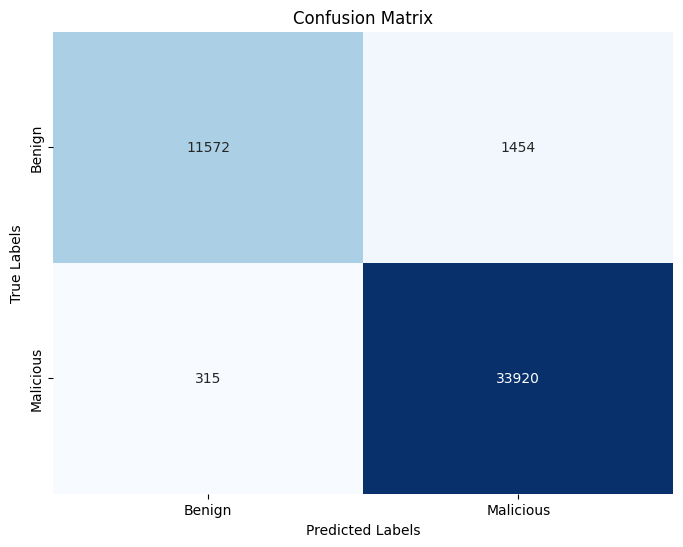

In [ ]:
class_names = ['Benign', 'Malicious']
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix in heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

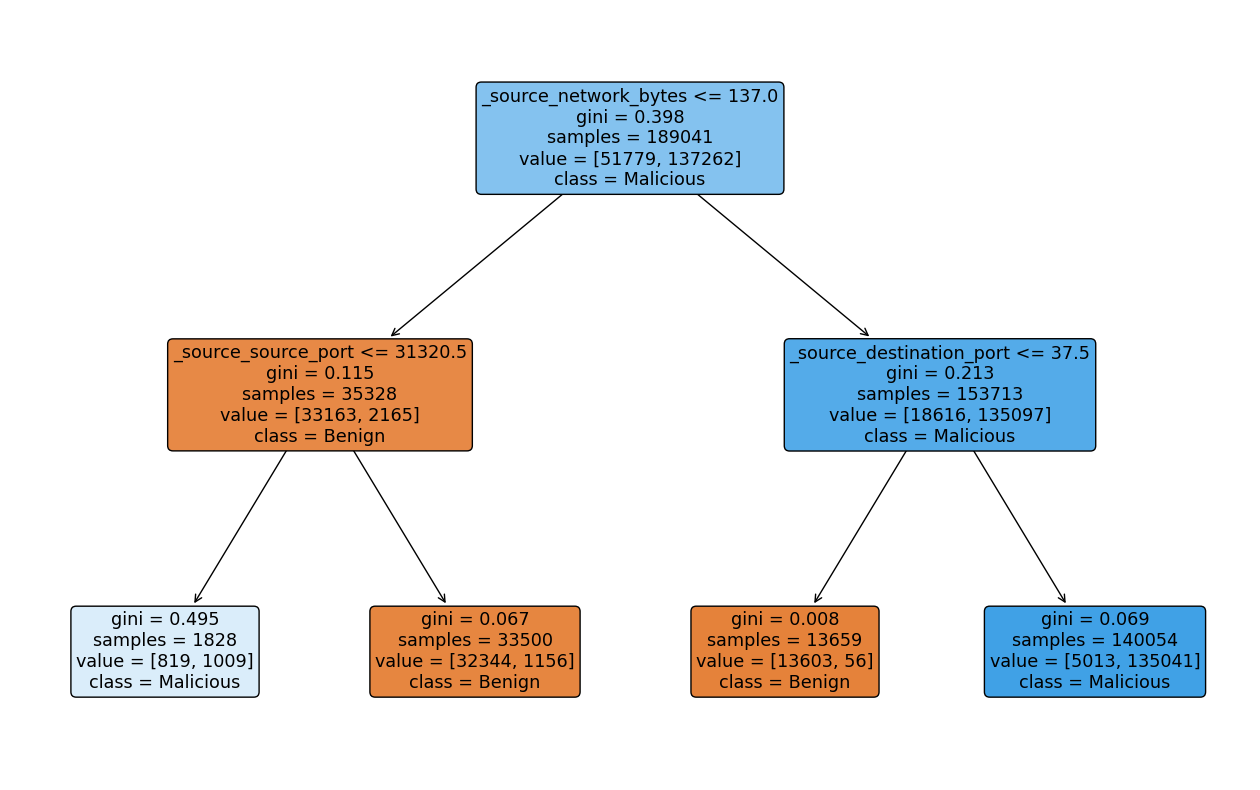

In [ ]:
plt.figure(figsize=(16, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, max_depth=3, class_names=['Benign','Malicious'], rounded=True)
plt.show()

In [ ]:
!pip install joblib
import joblib

In [ ]:
joblib.dump(dt_classifier, 'decisiontreemodel.pkl')


['decisiontreemodel.pkl']

In [ ]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(dt_classifier, f)


In [ ]:
!pip show sklearn